# General EDA Template: CA Housing (answers)
**Dr. Dave Wanik - Dept. Operations & Information Management - University of Connecticut**

-------------------------------

Exploratory Data Analysis (EDA) is all about telling a story with data. Try to fill in the blanks for memory everyday (type it, don't just copy/paste so that your fingers get used to the syntax!) You may not need to use all of these codes everytime, but you will use all of these often as you get to know a new dataset.

![houses in california](https://static.designeverest.com/static/images/blog/blog212.jpg)

-------------------------------

We will use the California Housing dataset for our study - here is a link to the .csv that you can download.
* https://drive.google.com/file/d/1zMWCDiRLElVpgkk_ckN8rh5Ghk8FC2uA/view?usp=sharing

And here is a description of the dataset:
* https://www.kaggle.com/camnugent/california-housing-prices

Note that the 'ocean_proximity' column is not included - it is not a numeric variable, it's a categorical variable - we will talk about categorical variables later on.

This data is available on Colab as a toy dataset, but we will practice reading a copy from our Drive after we mount it.

# The spirit of EDA...
It's time to get to know your data! Even though we didn't ask these questions directly, we found out the answers to the following questions by playing with our data:
* what does the distribution of the target variable look like? Is it skewed? (it's right skewed!)
* is there a relationship between total number of rooms in a house vs. total number of bedrooms? (yes! it's a positive, linear relationship)
* are there any missing values in the dataset? (no missing values!)
* what types of columns are in this dataset? any categorical columns? (just numeric columns!)

... and more! Right now, I want you to master the syntax for wrangling and visualizing the data. Soon, you'll be able to translate English into Python and then derive a biz insight!

#Import modules, mount your Google Drive, read data
Set up your environment. You need to:
* import packages/modules that are going to be useful for analysis (it's nice to keep them at the top of your script)
* mount your Drive (so you have access to files on your Google Drive)
* use `pandas` to read in the data

In [1]:
# import modules
import pandas as pd # for data wrangling
import numpy as np # for numeric python functions
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for more beautfiul plotting

In [2]:
# mount Google Drive - click on the left!
# then click through and copy/paste the code (don't share with anyone!)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read data
# navigate to the path where your data is on your drive!
# don't forget to use quotes

df = pd.read_csv('sample_data/california_housing_train.csv')

In [5]:
# look at the first few rows
df.head(n=5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Remember, `median_house_value` is the **target variable** (the thing you will be trying to predict!). Take a look at the columns, the names, the values within them (and see if they make sense to you!)

# Shape of the data, column names, data types, missing values
See what you're working with - any missing values? Wrong data types? Strange values?

* `df.shape` tells you how many (ROWS, COLUMNS) there are.
* `df.columns` tells you the NAMES of all of the columns in the dataframe (should match df.head() output!)
* `df.dtypes` tells you what [data types](https://pbpython.com/pandas_dtypes.html) there are

You will also check to see how many missing values in each column there are (for now, we are working with squeaky clean data!)

You can also do ALL OF THIS with one line of code - think of how clunky this would be in Excel!

In [6]:
# shape of data
df.shape

# remember, this is an attribute of the dataframe, not a function


(17000, 9)

In [7]:
# column names
df.columns

# remember, this is an attribute of the dataframe, not a function

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [8]:
# investigate data types
df.dtypes

# remember, this is an attribute, not a function

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64


In [9]:
# missing values (count per column!)
# https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
df.isna().sum()

# this is great, nice clean data!

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [10]:
# do all of the above with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


# Flag variables (recoding variables)
Convert some variables to 0 or 1 to explore trends. Similar to `IF` in Excel.

In [11]:
df['population'].describe()

,population
count,17000.000000
mean,1429.573941
std,1147.852959
min,3.000000
25%,790.000000
50%,1167.000000
75%,1721.000000
max,35682.000000


In [12]:
# create a 'FLAG' column and recode based on a condition
# you can be creative here

df['Flag_population'] = np.where(df['population'] > 1167,
                                 1, # if true, gets a 1
                                 0) # if flase, gets a 0

# this is just like Excel!

Now check your work! Notice that we created a column by using the syntax `df['NewColumn']` - try making another one on your own, then check your work.

In [13]:
df.head(n=10) # you will see the column added to the right side of the dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Flag_population
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,1
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,1
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,0


# Statistics, percentiles
Get some more granularity on numeric columns

Let's focus on the target variable, `median_house_value`. Notice how we need to use `['square brackets']` to get our column name from the dataframe `df`.

In [14]:
# measures of central tendency
np.mean(df['median_house_value']) # the mean of the column, just like excel!

np.float64(207300.91235294117)

In [15]:
# measures of spread (standard deviation)
np.std(df['median_house_value'])

115980.3530498538

In [16]:
# percentiles
np.quantile(df['median_house_value'], [0,0.25, 0.5, 0.75,1])

array([ 14999., 119400., 180400., 265000., 500001.])

Try to make a cute print statement, or a series of these print statements all together.

In [17]:
print('The mean of the median_house_price column was:', np.mean(df['median_house_value']))

The mean of the median_house_price column was: 207300.91235294117


In [18]:
print('The mean of the median_house_price column was:', np.mean(df['median_house_value']))
print('The std of the median_house_price column was:', np.std(df['median_house_value']))
print('The 90th percentile of the median_house_price column was:', np.quantile(df['median_house_value'], 0.9))
print('... and all units are in dollars!')

The mean of the median_house_price column was: 207300.91235294117
The std of the median_house_price column was: 115980.3530498538
The 90th percentile of the median_house_price column was: 379600.0
... and all units are in dollars!


# GroupBy and Describe (statistics by group (like a pivot table))
Count, min, max, mean, standard deviation.

* `df.describe()` is VERY USEFUL for numeric columns
* advanced: if you want to describe summary stats by a GROUPING VARIABLE, you need to use groupby. Note the order of the arguments. First argument is the thing you want to massage, and then you `groupby` your GROUPING VARIABLE.

In [19]:
# df.describe() is also useful for numeric variables
df.describe() # check your work! it should match what you see above

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Flag_population
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353,0.499529
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387,0.500014
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000,0.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000,0.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000,1.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000


In [20]:
# groupby is useful for calculating stats by group
# calculate the mean of 'median_house_value' column by 'Flag_population'
# this answers the question 'do people who live in heavily populated areas have a higher house price?' No!
# try to tease out the plain english
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df['median_house_value'].groupby(df['Flag_population']).mean()

,median_house_value
Flag_population,
0,212844.350494
1,201747.029675


# Univariate Plots
Boxplots, kernel density plots, histograms. Useful for analyzing the distribution of a variable - each has its merits.

## Boxplot
Remember: you can add nice titles and labels.

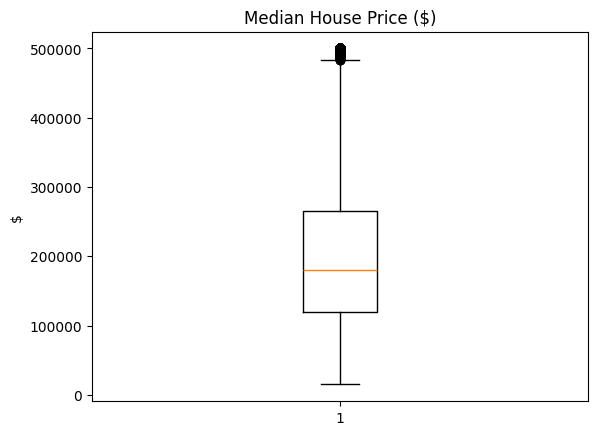

In [22]:
# boxplot
plt.boxplot(df['median_house_value'])
plt.ylabel('$') # units
plt.title('Median House Price ($)') # title
plt.show() # to get rid of yucky text

## Histograms
Remember: you can add nice titles and labels.

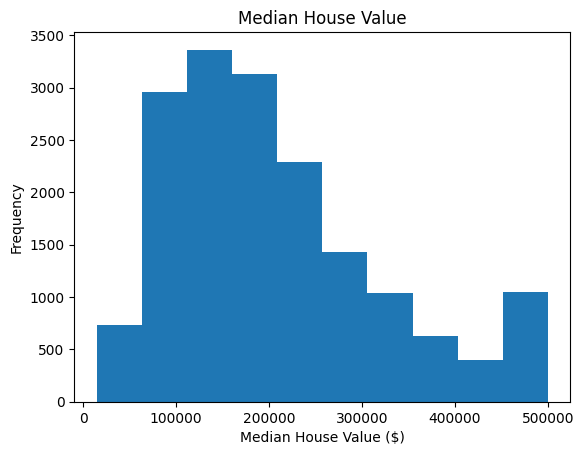

In [23]:
# histograms
plt.hist(df['median_house_value'])
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.title('Median House Value')
plt.show()

## Kernel Density Plots
Like a 'smooth histogram' - fits a probability density function to the variable.

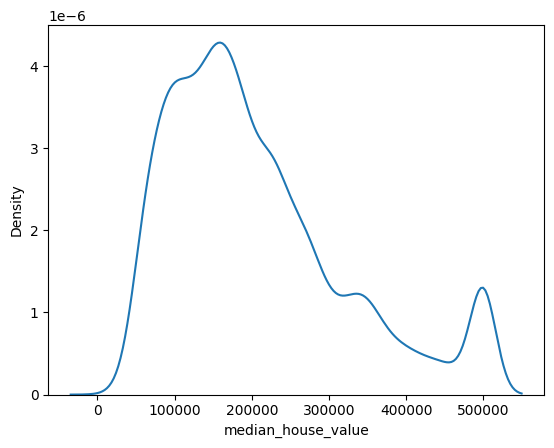

In [26]:
sns.kdeplot(x=df['median_house_value'])
plt.show()

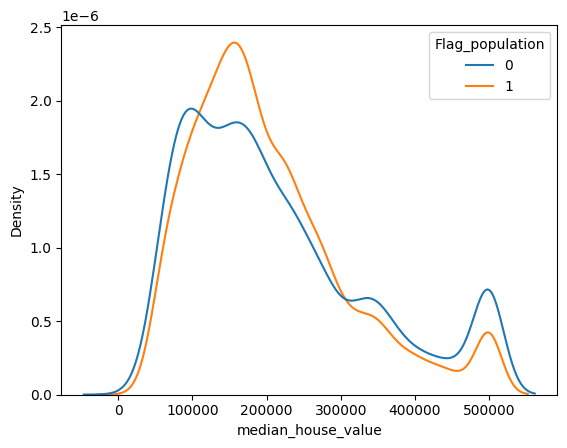

In [27]:
# by group? How about Flag_population?
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
sns.kdeplot(x=df['median_house_value'], hue=df['Flag_population'])
plt.show()

# Bivariate Plots
When we are talking about bivariate plots, we are typically talking about scatterplots.

## Scatterplots

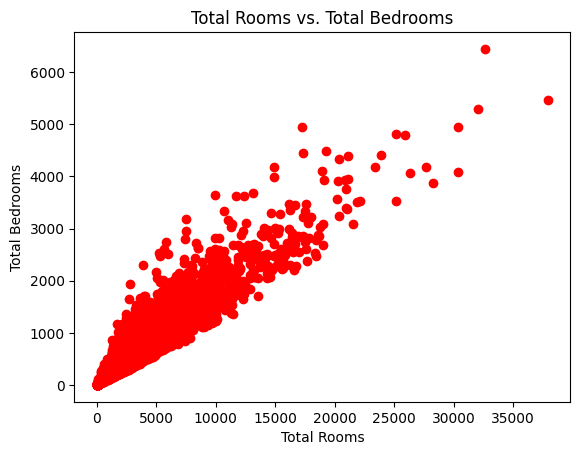

In [28]:
# specify X and Y
# let's make a scatterplot of X=total_rooms vs. Y total_bedrooms
plt.scatter(x=df['total_rooms'],
        y=df['total_bedrooms'],
        color='red') # play with this!
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.title('Total Rooms vs. Total Bedrooms')
plt.show()

# Scatterplots Colored by Group
You can view two variables and color the dots by group. Sometimes you will see something pop out!

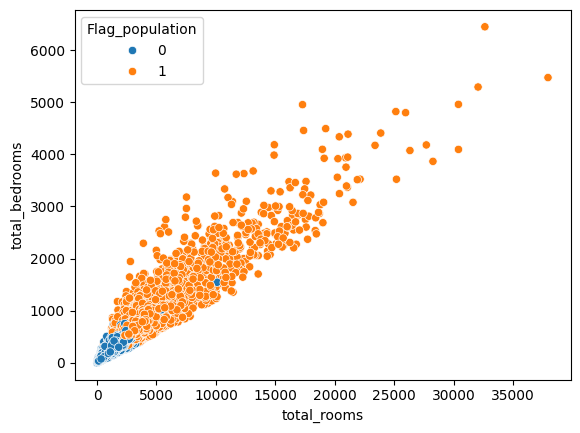

In [29]:
# specify X, Y and Z the 'hue' (the color by group)
sns.scatterplot(x=df['total_rooms'],
                y=df['total_bedrooms'],
                hue=df['Flag_population']) # play with this!
plt.show()

Suggestion: be careful of overlaying 'crowded' data... you may see other patterns if you change the layering! Sometimes it takes a bit of creativity to achieve this.

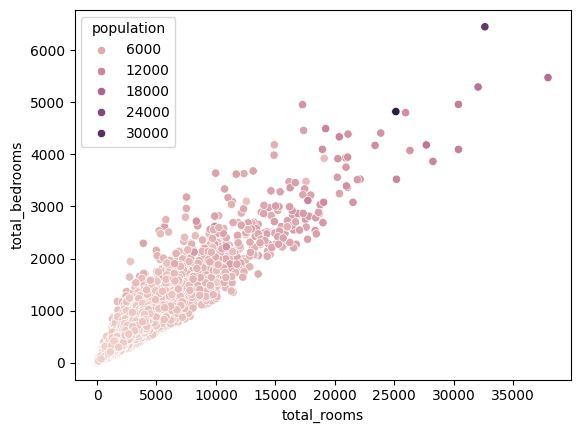

In [30]:
sns.scatterplot(x=df['total_rooms'],
                y=df['total_bedrooms'],
                hue=df['population']) # play with this! doesn't need to be category!
plt.show()

What if we don't need a column anymore? We can just drop it.

In [31]:
del df['Flag_population']
df.head(n=5) # check your work  - it's gone!

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# Correlation
Explore the relationship between numeric variables. A correlation of 1 means a positive (increasing) linear relationship between two numeric variables. A correlation of 0 means no linear relationship between two numeric variables. A correlation of -1 means a perfect negative (decreasing) linear relationship between two variables.

In [32]:
# show as a table
# you can use the correlation function from pandas
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


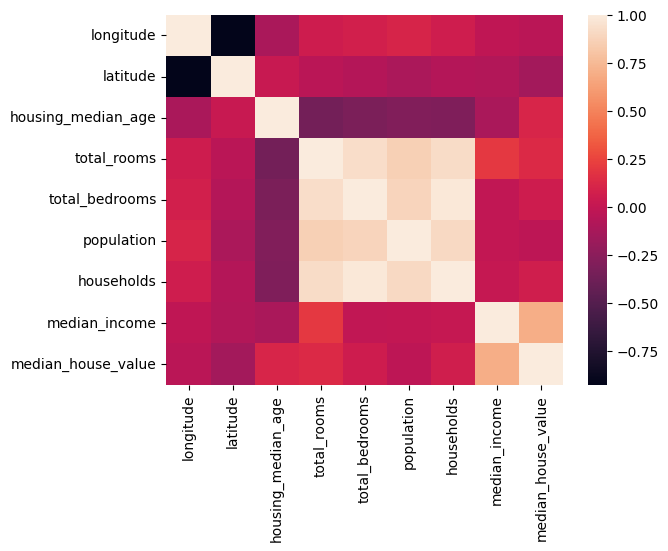

In [34]:
# show as a plot
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

corrMatrix = df.corr()
sns.heatmap(corrMatrix)
plt.show()

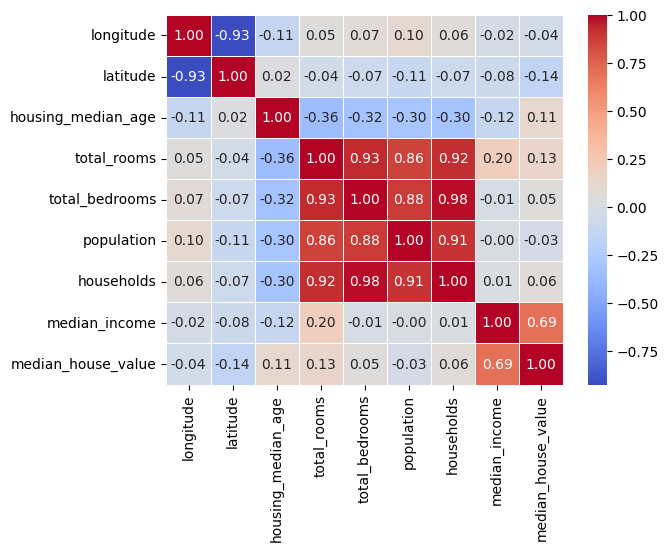

In [35]:
# show as a plot with numbers on it
# just add a keyword argument
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

# 🔥 Bubble Plot with Map

Here's a basic first attempt.

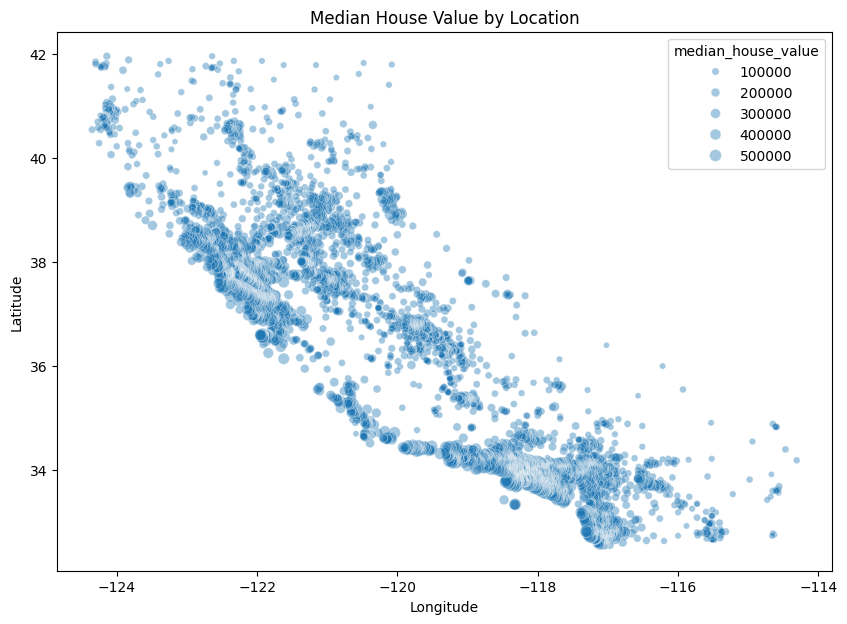

In [36]:
# prompt: make a bubble plot where it's latitude and longitude as points and median_house_value is the size of the bubble

import matplotlib.pyplot as plt
# make a bubble plot with latitude and longitude as points and median_house_value as the size of the bubble
plt.figure(figsize=(10, 7)) # set the figure size
sns.scatterplot(x="longitude",
                y="latitude",
                size="median_house_value", # size of the bubble
                alpha=0.4, # make the bubbles semi-transparent
                data=df)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Median House Value by Location")
plt.show()

Now put high-income bubbles on top (requires sorting!)

In [ ]:
# add code here...

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 98.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

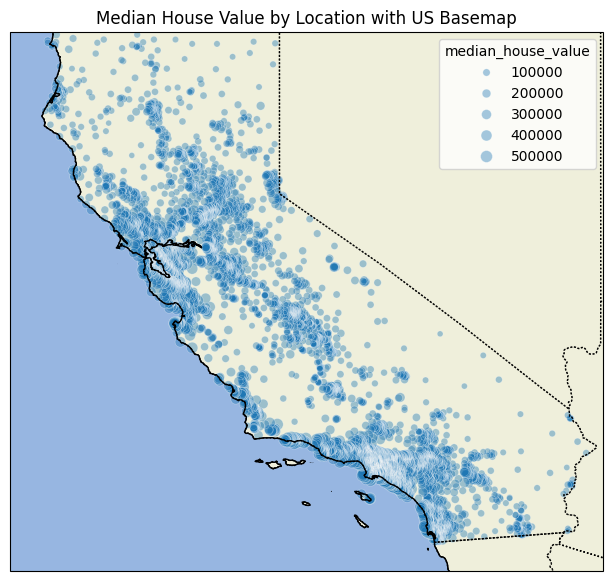

In [37]:
# prompt: make a bubble plot where it's latitude and longitude as points and median_house_value is the size of the bubble, add a basemap of the united states underneath

import matplotlib.pyplot as plt
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -114, 32, 42]) # Set the extent for California region

# Add basic coastline and states
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add land and ocean features for better visual context
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Plot the data
sns.scatterplot(x="longitude",
                y="latitude",
                size="median_house_value", # size of the bubble
                alpha=0.4, # make the bubbles semi-transparent
                data=df,
                ax=ax, # Pass the Cartopy axes to Seaborn
                transform=ccrs.Geodetic()) # Specify data coordinate system

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Median House Value by Location with US Basemap")
plt.show()

# Pandas profiler
For a quick, automated check of the data... try Pandsa profiler!

In [ ]:
# !pip install pandas==0.23.4 # restart your runtime, then run all

In [ ]:
# copy over the repository from github
%pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof # show the report

# On Your Own/Closing Thoughts
It's UP TO YOU to start to master this - the Python needs to flow from your mind and through your fingers. Speed comes with practice. Start slow - do this once per day for the next week. You will start to master basics like:
* selecting a column of interest
* when to use round brackets vs. square brackets
* how to make custom labels on a plot

You can also GOOGLE THE ANSWER to the question you have (e.g. 'how do I calculate the median of all columns?') Try to say what you're trying to do in plain English - don't get hung up on syntax right away. It will build with practice.

For now, you should consider data science like following a recipe. As a newbie, you should stick to the recipe religiously. As you build your confidence and proficincies, you can start to experiment (make lots of mistakes - getting an error message is fine - you won't break the computer!)

You should also appreciate that folks are writing codes to do the work for you - it's getting easier and easier (e.g. look at how cool Pandas profiler is!)... more good things to come... there are also codes to fit thousands of models for you with one line of code! More on that later, too.


